In [0]:
# get text data from url
import urllib.request
stringInURL = "https://www.gutenberg.org/files/2852/2852-0.txt"
urllib.request.urlretrieve(stringInURL, "/tmp/pooja.txt")

Out[1]: ('/tmp/pooja.txt', <http.client.HTTPMessage at 0x7fedf4040640>)

In [0]:
dbutils.fs.mv("file:/tmp/pooja.txt", "dbfs:/data/pooja.txt")

Out[2]: True

In [0]:
pooja_RDD = sc.textFile("dbfs:/data/pooja.txt")

In [0]:
# flatmap each line to words
wordsRDD = pooja_RDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
# map() words to (words,1) intermediate key-value pairs.
import re
# remove punctutation
clean_tokens_RDD = wordsRDD.map(lambda w: re.sub(r'[^a-zA-Z]','',w))
#prepare to clean stopwords
from pyspark.ml.feature import StopWordsRemover
remove =StopWordsRemover()
stopwords = remove.getStopWords()
clean_words_RDD=clean_tokens_RDD.filter(lambda wrds: wrds not in stopwords)
#maps the words to key value pairs
IKVPairsRDD= clean_words_RDD.map(lambda word: (word,1))


In [0]:
# reduceByKey() to get (word,count) results
pooja_word_count_RDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)

In [0]:
pooja_results = pooja_word_count_RDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(25)
print(pooja_results)

[(1857, ''), (348, 'sir'), (316, 'upon'), (240, 'said'), (240, 'one'), (200, 'man'), (186, 'holmes'), (184, 'us'), (157, 'moor'), (144, 'henry'), (117, 'may'), (117, 'know'), (115, 'see'), (112, 'watson'), (111, 'baskerville'), (111, 'well'), (110, 'dr'), (97, 'must'), (90, 'think'), (89, 'come'), (88, 'might'), (87, 'project'), (86, 'mortimer'), (84, 'time'), (84, 'stapleton')]

In [0]:
# collect() action to get back to python
results = pooja_word_count_RDD.collect()
print(results)

[('', 1857), ('project', 87), ('arthur', 2), ('doyle', 5), ('ebook', 9), ('use', 25), ('anyone', 23), ('anywhere', 5), ('restrictions', 2), ('whatsoever', 2), ('may', 117), ('give', 41), ('away', 62), ('reuse', 2), ('gutenberg', 28), ('online', 4), ('title', 3), ('last', 75), ('july', 1), ('language', 1), ('set', 35), ('encoding', 1), ('utf', 1), ('start', 10), ('produced', 3), ('shreevatsa', 2), ('r', 2), ('widger', 2), ('holmes', 186), ('robinson', 1), ('account', 10), ('westcountry', 1), ('help', 43), ('details', 6), ('thanks', 1), ('truly', 1), ('hindhead', 1), ('contents', 1), ('chapter', 31), ('mr', 63), ('henry', 144), ('baskerville', 111), ('three', 26), ('threads', 5), ('merripit', 16), ('house', 66), ('upon', 316), ('moor', 157), ('extract', 4), ('tor', 14), ('retrospection', 2), ('late', 16), ('mornings', 2), ('save', 14), ('occasions', 3), ('night', 68), ('seated', 1), ('stood', 34), ('hearthrug', 1), ('picked', 3), ('fine', 7), ('thick', 11), ('wood', 4), ('bulbousheaded', 1), ('known', 21), ('penang', 1), ('head', 32), ('broad', 12), ('silver', 4), ('band', 2), ('james', 10), ('mortimer', 86), ('mrcs', 3), ('family', 37), ('used', 15), ('carrydignified', 1), ('make', 49), ('sitting', 8), ('sign', 9), ('occupation', 1), ('know', 117), ('believe', 19), ('eyes', 69), ('wellpolished', 1), ('said', 240), ('tell', 69), ('unfortunate', 6), ('notion', 1), ('errand', 4), ('accidental', 1), ('souvenir', 1), ('let', 23), ('hear', 24), ('think', 90), ('following', 11), ('far', 43), ('companion', 9), ('medical', 9), ('wellesteemed', 1), ('mark', 8), ('appreciation', 2), ('good', 56), ('excellent', 9), ('country', 25), ('deal', 10), ('though', 28), ('originally', 1), ('knocked', 1), ('thickiron', 1), ('ferrule', 1), ('evident', 12), ('amount', 2), ('perfectly', 7), ('sound', 25), ('guess', 9), ('something', 43), ('hunt', 9), ('whose', 9), ('members', 1), ('surgical', 1), ('assistance', 6), ('presentation', 6), ('really', 29), ('pushing', 1), ('chair', 8), ('say', 72), ('accounts', 2), ('achievements', 1), ('underrated', 1), ('abilities', 1), ('luminous', 3), ('genius', 2), ('power', 13), ('stimulating', 2), ('confess', 10), ('never', 65), ('must', 97), ('admit', 2), ('gave', 28), ('keen', 7), ('admiration', 4), ('publicity', 1), ('way', 63), ('earned', 1), ('took', 34), ('examined', 7), ('minutes', 13), ('naked', 1), ('expression', 11), ('interest', 25), ('looked', 47), ('interesting', 14), ('certainly', 32), ('two', 78), ('indications', 5), ('us', 184), ('basis', 3), ('several', 25), ('anything', 40), ('selfimportance', 1), ('overlooked', 3), ('stimulated', 1), ('frank', 4), ('fallacies', 1), ('guided', 2), ('towards', 23), ('walks', 3), ('right', 41), ('extent', 4), ('allby', 1), ('means', 21), ('suggest', 9), ('doctor', 5), ('likely', 11), ('hospital', 10), ('initials', 7), ('cc', 1), ('placed', 9), ('charing', 7), ('cross', 13), ('direction', 21), ('take', 34), ('working', 3), ('hypothesis', 1), ('unknown', 7), ('stand', 7), ('inferences', 2), ('draw', 3), ('none', 15), ('conclusion', 5), ('farther', 8), ('look', 28), ('occasion', 8), ('unite', 2), ('pledge', 2), ('service', 8), ('change', 8), ('stretching', 1), ('staff', 5), ('wellestablished', 1), ('position', 15), ('yet', 54), ('housesurgeon', 2), ('senior', 1), ('student', 1), ('years', 19), ('grave', 5), ('middleaged', 2), ('vanishes', 1), ('emerges', 1), ('young', 21), ('thirty', 4), ('amiable', 4), ('unambitious', 3), ('absentminded', 4), ('possessor', 1), ('describe', 6), ('larger', 3), ('mastiff', 3), ('blew', 1), ('wavering', 1), ('rings', 2), ('ceiling', 2), ('latter', 10), ('professional', 6), ('career', 4), ('directory', 2), ('turned', 44), ('name', 46), ('mortimers', 4), ('read', 22), ('record', 3), ('dartmoor', 6), ('devon', 4), ('winner', 1), ('jackson', 1), ('prize', 1), ('comparative', 2), ('pathology', 1), ('entitled', 2), ('reversion', 1), ('society', 1), ('freaks', 1), ('atavism', 1), ('lancet', 1), ('progress', 3), ('officer', 1), ('parishes', 1), ('t

Count Words
0 1857 
1 348 sir
2 316 upon
3 240 said
4 240 one
5 200 man
6 186 holmes
7 184 us
8 157 moor
9 144 henry
10 117 may
11 117 know
12 115 see
13 112 watson
14 111 baskerville
15 111 well
16 110 dr
17 97 must
18 90 think
19 89 come
20 88 might
21 87 project
22 86 mortimer
23 84 time
24 84 stapleton
Out[16]:

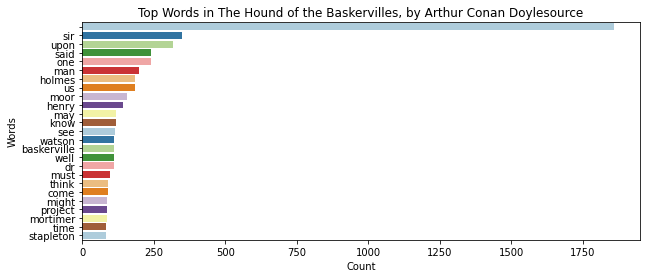

Text(0.5, 1.0, 'Top Words in The Hound of the Baskervilles, by Arthur Conan Doylesource')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

source = 'The Hound of the Baskervilles, by Arthur Conan Doylesource'
title = 'Top Words in ' + source
xlabel = 'Count'
ylabel = 'Words'

# create Pandas dataframe from list of tuples
df = pd.DataFrame.from_records(pooja_results, columns =[xlabel, ylabel]) 
print(df)

# create plot (using matplotlib)
plt.figure(figsize=(10,4))
sns.barplot(xlabel, ylabel, data=df, palette="Paired").set_title(title)